In [1]:
import sys
print(sys.version)

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


In [2]:
import tensorflow as tf
print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from keras.models import load_model
model = load_model('Pretrain/musinsa_NeuMF_8_[64,32,16,8]_1659157666.h5')

In [ ]:
import pandas as pd

df = pd.read_csv('')

In [ ]:
# all unique user ids
user_ids = df['유저명'].unique().tolist()
num_all_user = len(user_ids)

# randomly select 20% users from rating dataset 
np.random.seed(123)
rand_userid = np.random.choice(user_ids, size = int(num_all_user * 0.1), replace=False)
sample_df = df.loc[df['유저명'].isin(rand_userid)]

# userid, itemid encoding by inSdices
user_ids = sample_df['유저명'].unique()
num_users = len(user_ids)
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
sample_df['user_encoded'] = sample_df['유저명'].map(user2user_encoded)

items_ids = sample_df['아이템명'].unique()
num_items = len(items_ids)
item2item_encoded = {x: i for i, x in enumerate(items_ids)}
item_encoded2item = {i: x for i, x in enumerate(items_ids)}
sample_df['item_encoded'] = sample_df['아이템명'].map(item2item_encoded)

# train-test split
train, test = train_test_split(sample_df, test_size = 0.2, random_state=123)

num_train_user = len(np.unique(train['user_encoded']))
num_train_item = len(np.unique(train['item_encoded']))

print(f'total item: {num_items}', 
      f'\nitem in train: {num_train_item}', 
      f'\nitem not in train: {num_items - num_train_item} ({1 - num_train_item / num_items :.2f})', 
      f'\n\ntotal user: {num_users}', 
      f'\nuser in train: {num_train_user}', 
      f'\nuser not in train: {num_users - num_train_user} ({1 - num_train_user / num_users :.2f})'
     )

In [ ]:
# input: a recommendation model (keras model), user id, number of recommendation
# output: a dataframe of top-k recommendations along with item information

def NCF_recommendation(rec_model, client_id, top_k = 20):
    client_encoded = user2user_encoded[client_id]
    items_buy = sample_df[sample_df['유저명'] == client_id]['아이템명'].values
    
    item_poll_encoded = []
    for item in items_ids:
        if not np.isin(item, items_buy):
            item_poll_encoded.append(item2item_encoded[item])
            
    d = {'user_encoded': [client_encoded] * len(item_poll_encoded), 'item_encoded' : item_poll_encoded}
    client_df = pd.DataFrame(d)
    
    ratings = rec_model.predict([client_df['user_encoded'], client_df['item_encoded']])
    
    top_ratings_idx = ratings.flatten().argsort()[-top_k:][::-1]
    top_ratings = ratings[top_ratings_idx].flatten()
    recommend_itemId = [item_encoded2item.get(item_poll_encoded[x]) for x in top_ratings_idx]
    
    top_item_rec = pd.DataFrame({'itemId': recommend_itemId, 'prediction': top_ratings}).set_index('itemId')

    return top_item_rec

In [ ]:
client_id = int(np.random.choice(user_ids, 1))
print(f'recommendation for client: {client_id}')
NCF_recommendation(model, client_id, top_k=15)

# LV 5 이땡땡님

In [ ]:
# 실제 데이터
df.query('유저명 == "LV 5 이땡땡님"')

,유저명,아이템명,user_encoded,item_encoded
12892,LV 5 이땡땡님,썸머 더블턱 와이드 슬랙스[블랙],398,9299
12893,LV 5 이땡땡님,KODACOLOR 워싱 니트 숏팬츠 CHARCOAL,398,9300
12894,LV 5 이땡땡님,KODACOLOR 반팔티셔츠 CHARCOAL,398,9301
12895,LV 5 이땡땡님,[SET] 로럴골든 하프 맨투맨 셋업_화이트멜란지,398,9302
12896,LV 5 이땡땡님,[SET] 쓰리피스 컴피 후드 아노락 셋업_블랙,398,1763
12897,LV 5 이땡땡님,SELLER LOGO SS TEE WHITE(CV2BMMT500A),398,9303
12898,LV 5 이땡땡님,커브드 와이드 데님 팬츠_인디고,398,1318
12899,LV 5 이땡땡님,올드스쿨(캔버스) - 블랙:트루 화이트 / VN000ZDF1WX1,398,2186
12900,LV 5 이땡땡님,솔리드 옥스포드 오버셔츠(화이트),398,1213
12901,LV 5 이땡땡님,시티보이 빅오버 옥스포드 셔츠_Royal Blue,398,451


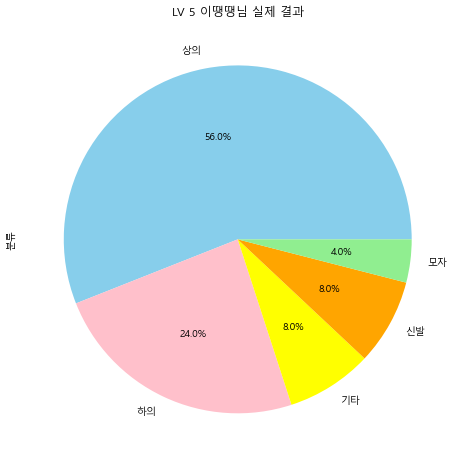

In [ ]:
# LV 5 이땡땡님 실제 결과
a = pd.DataFrame({'종류' : ['하의','상의','상의','상의','상의','신발','하의','신발','상의','상의','하의','상의','기타','상의','상의','기타','모자','상의','상의','하의','상의','하의','상의','하의','상의']}).reset_index()
a.groupby('종류')['index'].count().sort_values(ascending = False).plot.pie(figsize = (14, 8), autopct = '%.1f%%', colors = ['skyblue','pink','yellow','orange','lightgreen'])
plt.title('LV 5 이땡땡님 실제 결과')
plt.ylabel('분류')
plt.show()

In [ ]:

# 추천 데이터
NCF_recommendation(model, "LV 5 이땡땡님", top_k=15).head(20)

,prediction
itemId,
(VEGAN)WARM UP SHORT PUFFER JACKET BLACK,0.999656
칼라 프린지 트리 하프 슬리브 니트_그린,0.970211
sw1403 램스울 라운드 니트-네이비,0.964336
TC1-SH08 프렌치 스트라이프 셔츠-그레이 그린,0.959872
핸드워시 50ml,0.954526
Heavy Corduroy Shirt S85 Ivory,0.937486
오픈카라 피케 루즈핏 반팔티 (NAVY BLUE),0.909393
페이퍼 코튼 오버핏 반팔 셔츠 [CREAM BEIGE],0.900607
블랙 미니멀 트위스트 버클 벨트,0.884704


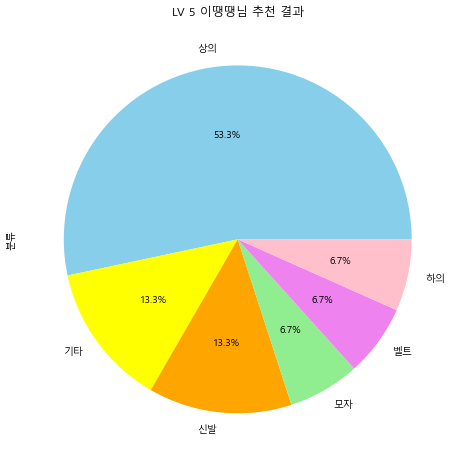

In [ ]:
# LV 5 이땡땡님 추천 결과
a = pd.DataFrame({'종류' : ['상의','상의','상의','상의','기타','상의','상의','상의','벨트','기타','신발','모자','하의','상의','신발']}).reset_index()
a.groupby('종류')['index'].count().sort_values(ascending = False).plot.pie(figsize = (14, 8), autopct = '%.1f%%', colors = ['skyblue','yellow','orange','lightgreen','violet' ,'pink'])
plt.title('LV 5 이땡땡님 추천 결과')
plt.ylabel('분류')
plt.show()

# LV 6 HAHAH0H0

In [ ]:
# 실제 데이터
df.query('유저명 == "LV 6 HAHAH0H0"')

,유저명,아이템명,user_encoded,item_encoded
21560,LV 6 HAHAH0H0,[2세트]두가지연출 러블리 세라 니삭스,659,14669
21561,LV 6 HAHAH0H0,SMALL CLASSIC LOGO CAP pink,659,14670
21562,LV 6 HAHAH0H0,Contrast Stitch Carpenter Pants Beige,659,14671
21563,LV 6 HAHAH0H0,지오메트리컬 사이드 다트 팬츠 블랙,659,14672
21564,LV 6 HAHAH0H0,COLOR POINT COATING JUMPER IN WHITE,659,14673
21565,LV 6 HAHAH0H0,BABY SPORTY TOTE BAG IN RED,659,14674
21566,LV 6 HAHAH0H0,MATIN KIM BASIC WALLET IN BLACK,659,14675
21567,LV 6 HAHAH0H0,와이드 절개 벌룬팬츠 코튼 카키,659,6571
21568,LV 6 HAHAH0H0,유스풀 벌룬 맨투맨 네이비 SJMT1330,659,14676
21569,LV 6 HAHAH0H0,[GF70SOG] 리버스 위브 크루 - 옥스포드 그레이(스티치),659,14677


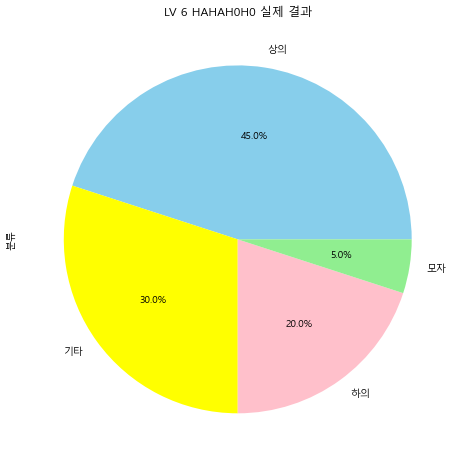

In [ ]:
# LV 6 HAHAH0H0 실제 결과
a = pd.DataFrame({'종류' : ['기타','모자','하의','하의','상의','기타','기타','하의','상의','상의','상의','상의','기타','기타','기타','상의','상의','상의','상의','하의']}).reset_index()
a.groupby('종류')['index'].count().sort_values(ascending = False).plot.pie(figsize = (14, 8), autopct = '%.1f%%', colors = ['skyblue','yellow','pink','lightgreen'])
plt.title('LV 6 HAHAH0H0 실제 결과')
plt.ylabel('분류')
plt.show()

In [ ]:
# 추천 데이터
NCF_recommendation(model, "LV 6 HAHAH0H0", top_k=15).head(20)

,prediction
itemId,
MNC 트레이닝 스웨트 팬츠 그레이,0.998288
CLASSIC LOGO TEE white,0.957477
[쿨탠다드] 팔토시 2팩 [화이트/블랙],0.957141
TSHIRT BIG APPLE_IVORY,0.956645
향수공병 휴대용 향수리필 스프레이 용기 5ml,0.954893
[락피쉬웨더웨어x마르디메크르디] 오리지널 플랫폼 슬리퍼 - BLACK,0.938926
제로 선 클린 세트,0.937364
Vivid Flow Ring_7Color,0.926831
밸런스턱 와이드 치노 팬츠[블랙],0.905889


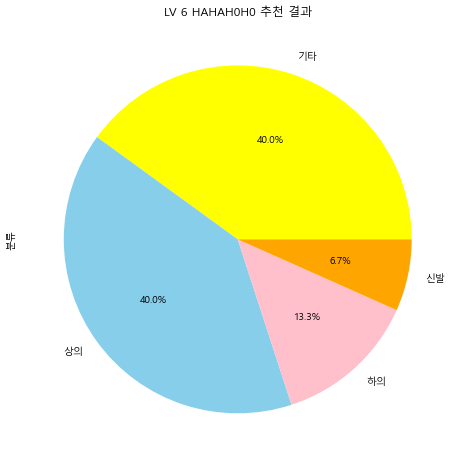

In [ ]:
# LV 6 HAHAH0H0 추천 결과
a = pd.DataFrame({'종류' : ['하의','상의','기타','상의','기타','신발','기타','상의','하의','기타','기타','기타','상의','상의','상의']}).reset_index().rename(columns = {'index' : '비율'})
a.groupby('종류')['비율'].count().sort_values(ascending = False).plot.pie(figsize = (14, 8), autopct = '%.1f%%', colors = ['yellow','skyblue','pink','orange'])
plt.title('LV 6 HAHAH0H0 추천 결과')
plt.ylabel('분류')NCF_recommendation(model, "LV 6 HAHAH0H0", top_k=15).head(20)
plt.show()

# LV 7 isn_tshepretty_

In [ ]:
# 실제 데이터
df.query('유저명 == "LV 7 isn_tshepretty_"')

,유저명,아이템명,user_encoded,item_encoded
29486,LV 7 isn_tshepretty_,RUNNING RETRIEVER SHORT SLEEVE [NAVY],884,18847
29487,LV 7 isn_tshepretty_,B Logo T-Shirts / WHITE MELANGE,884,18848
29488,LV 7 isn_tshepretty_,B Logo T-Shirts / BLACK,884,18849
29489,LV 7 isn_tshepretty_,[SET] 헤비웨이트 CGP 아치 로고 트레이닝 셋업_그레이,884,5357
29490,LV 7 isn_tshepretty_,컨버스 X 꼼데 가르송 플레이 척 70[행사용-판매종료],884,18850
...,...,...,...,...
29548,LV 7 isn_tshepretty_,와이드 스웨트팬츠 블랙,884,9969
29549,LV 7 isn_tshepretty_,오버사이즈 트렌치 코트 BLACK,884,5241
29550,LV 7 isn_tshepretty_,Fleece Trucker Jacket - KHAKI BROWN,884,18879
29551,LV 7 isn_tshepretty_,[비건레더] 크루얼티프리 카라넥 MA-1 레더 점퍼 IRO112 아이보리,884,5737


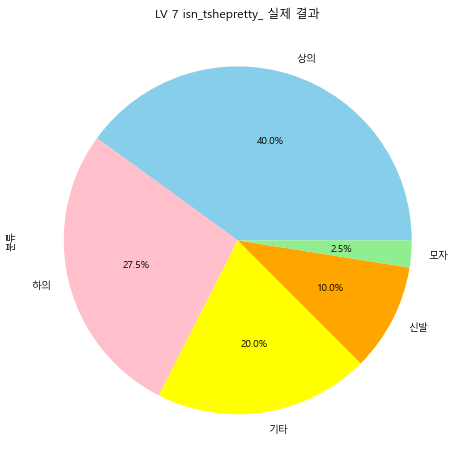

In [ ]:
# df.query('유저명 == "LV 7 isn_tshepretty_"') 실제 결과
a = pd.DataFrame({'종류' : ['하의','상의','상의','하의','신발','신발','상의','신발','신발','상의','모자','상의','상의','하의','기타','상의','하의','상의','상의','상의','기타','기타','상의','하의','하의','하의','하의','하의','상의','기타','상의','기타','기타','상의','하의','하의','상의','기타','상의','기타']}).reset_index()
a.groupby('종류')['index'].count().sort_values(ascending = False).plot.pie(figsize = (14, 8), autopct = '%.1f%%', colors = ['skyblue','pink','yellow','orange','lightgreen'])
plt.title('LV 7 isn_tshepretty_ 실제 결과')
plt.ylabel('분류')
plt.show()

In [ ]:
# 추천 데이터
NCF_recommendation(model, "LV 7 isn_tshepretty_", top_k=15).head(20)

,prediction
itemId,
와이드 스트링 하프 셔츠 _Off White,0.998846
LMC IDEAL TRACK SETUP gray,0.887792
여성 하이드로목 WHITE(화이트) 컬러 MLW1C2QA1801,0.881251
와이드 이지 밴딩 크롭 슬랙스 [더스티 베이지],0.863966
크림 퍼퓸 더 퍼스트 무드,0.829631
오버핏 옥스포드 셔츠_SPYWC12C02,0.817937
프림백-아이보리,0.759933
[비건스웨이드] 라운드 스타디움 스웨이드 자켓 IRO131 아이보리,0.694951
클래식 핏 폴로 프렙스터 코듀로이 - 화이트,0.694588


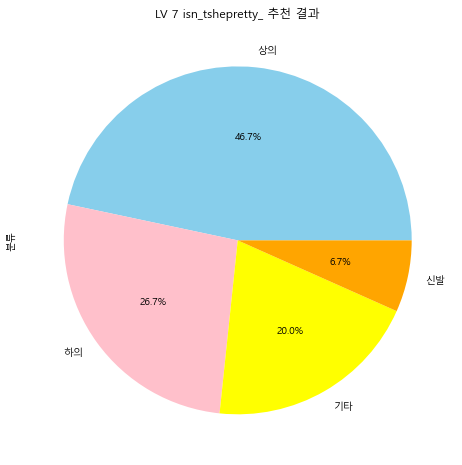

In [ ]:
# LV 7 isn_tshepretty_ 추천 결과
a = pd.DataFrame({'종류' : ['상의','상의','기타','하의','기타','상의','신발','상의','상의','기타','하의','상의','하의','하의','상의']}).reset_index()
a.groupby('종류')['index'].count().sort_values(ascending = False).plot.pie(figsize = (14, 8), autopct = '%.1f%%', colors = ['skyblue','pink','yellow','orange'])
plt.title('LV 7 isn_tshepretty_ 추천 결과')
plt.ylabel('분류')NCF_recommendation(model, "LV 7 isn_tshepretty_", top_k=15).head(20)
plt.show()